In [29]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [35]:
#Define State

class BMIState(TypedDict):
    weight_kg: float
    height_mt: float
    bmi:float
    category:str

In [36]:
def calculaate_BMI(state:BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_mt']
    bmi = weight/(height**2)
    state['bmi'] = round(bmi,2)
    return state



def label_BMI(state:BMIState)->BMIState:
    bmi = state['bmi']
    if (bmi< 18.7):
        state['category']= "under-Weight"
    elif (bmi<25):
         state['category']="normal"
    elif(bmi<30):
         state['category']="over-weight"
    else:
         state['category']="obese"
             
    return state

In [39]:
#Define Your Graph

graph = StateGraph(BMIState)

# Add Notes to your Graph


graph.add_node("calculaate_BMI",calculaate_BMI)
graph.add_node("label_BMI",label_BMI)

# Add Edges to your graph
graph.add_edge(START,'calculaate_BMI')
graph.add_edge('calculaate_BMI','label_BMI')
graph.add_edge('label_BMI',END)

# Connect the Graph
workflow = graph.compile()


In [44]:
# Execute the Graph
initial_state = {'weight_kg':85,'height_mt':1.73}
Final_state= workflow.invoke(initial_state)
print(Final_state)

{'weight_kg': 85, 'height_mt': 1.73, 'bmi': 28.4, 'category': 'over-weight'}


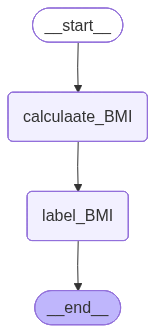

In [42]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())